In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.datasets as datasets

In [2]:
#load the data
data  = pd.read_csv(r"C:\Users\trinkesh\Downloads\SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
#shap of data
data.shape

(9994, 13)

In [4]:
#description
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
#information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
data.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [7]:
data.tail(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9984,Standard Class,Consumer,United States,Long Beach,New York,11561,East,Office Supplies,Labels,31.500,10,0.0,15.1200
9985,Standard Class,Consumer,United States,Long Beach,New York,11561,East,Office Supplies,Supplies,55.600,4,0.0,16.1240
9986,Standard Class,Consumer,United States,Los Angeles,California,90008,West,Technology,Accessories,36.240,1,0.0,15.2208
9987,Standard Class,Corporate,United States,Athens,Georgia,30605,South,Technology,Accessories,79.990,1,0.0,28.7964
9988,Standard Class,Corporate,United States,Athens,Georgia,30605,South,Technology,Phones,206.100,5,0.0,55.6470
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [8]:
data.max()

Ship Mode       Standard Class
Segment            Home Office
Country          United States
City                      Yuma
State                  Wyoming
Postal Code              99301
Region                    West
Category            Technology
Sub-Category            Tables
Sales                  22638.5
Quantity                    14
Discount                   0.8
Profit                 8399.98
dtype: object

In [9]:
data.min()

Ship Mode         First Class
Segment              Consumer
Country         United States
City                 Aberdeen
State                 Alabama
Postal Code              1040
Region                Central
Category            Furniture
Sub-Category      Accessories
Sales                   0.444
Quantity                    1
Discount                    0
Profit               -6599.98
dtype: object

      Ship Mode  Segment  Country   City  State  Postal Code  Region  \
0         False    False    False  False  False        False   False   
1         False    False    False  False  False        False   False   
2         False    False    False  False  False        False   False   
3         False    False    False  False  False        False   False   
4         False    False    False  False  False        False   False   
...         ...      ...      ...    ...    ...          ...     ...   
9989      False    False    False  False  False        False   False   
9990      False    False    False  False  False        False   False   
9991      False    False    False  False  False        False   False   
9992      False    False    False  False  False        False   False   
9993      False    False    False  False  False        False   False   

      Category  Sub-Category  Sales  Quantity  Discount  Profit  
0        False         False  False     False     False   False  
1  

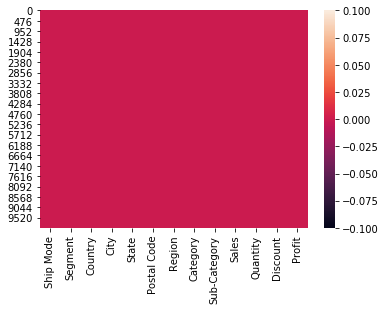

In [10]:
print(data.isnull())
print(data.isnull().sum())
print(sns.heatmap(data.isnull()))

In [11]:
#all unique cities of us 
print(data["City"].unique())
print(" Number of cities in dataset",data["City"].nunique(),"\n")
print(data["City"].value_counts())

['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 'Santa Clara' 'Lakeville' 'San Diego' 'Brentwood' 'Chapel Hill'
 'Morristown' 'Cincinnati' 'Inglewood' 'Tamarac' 'Colorado Springs'
 'Belleville' 'Taylor' 'Lakewood' 'Arlington' 'Arvada' 'Hackensack'
 'Saint Petersburg'

In [12]:
print(data["State"].unique())
print(" Number of cities in dataset",data["State"].nunique(),"\n")
print(data["State"].value_counts())

['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']
 Number of cities in dataset 49 

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Te

In [13]:
#unique catogaries of data
data["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [14]:
data["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [15]:
data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


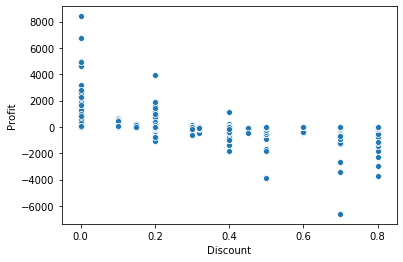

In [16]:
sns.scatterplot(x = 'Discount',y ='Profit',data = data)
plt.show()

In [17]:
data["Discount"].mean()

0.15620272163298934

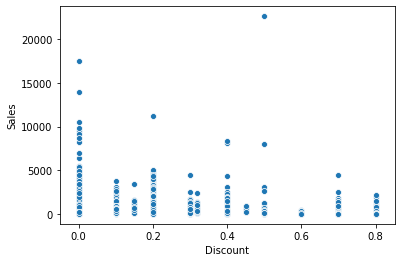

In [18]:
sns.scatterplot(x = 'Discount',y ='Sales',data = data)
plt.show()

In [19]:
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

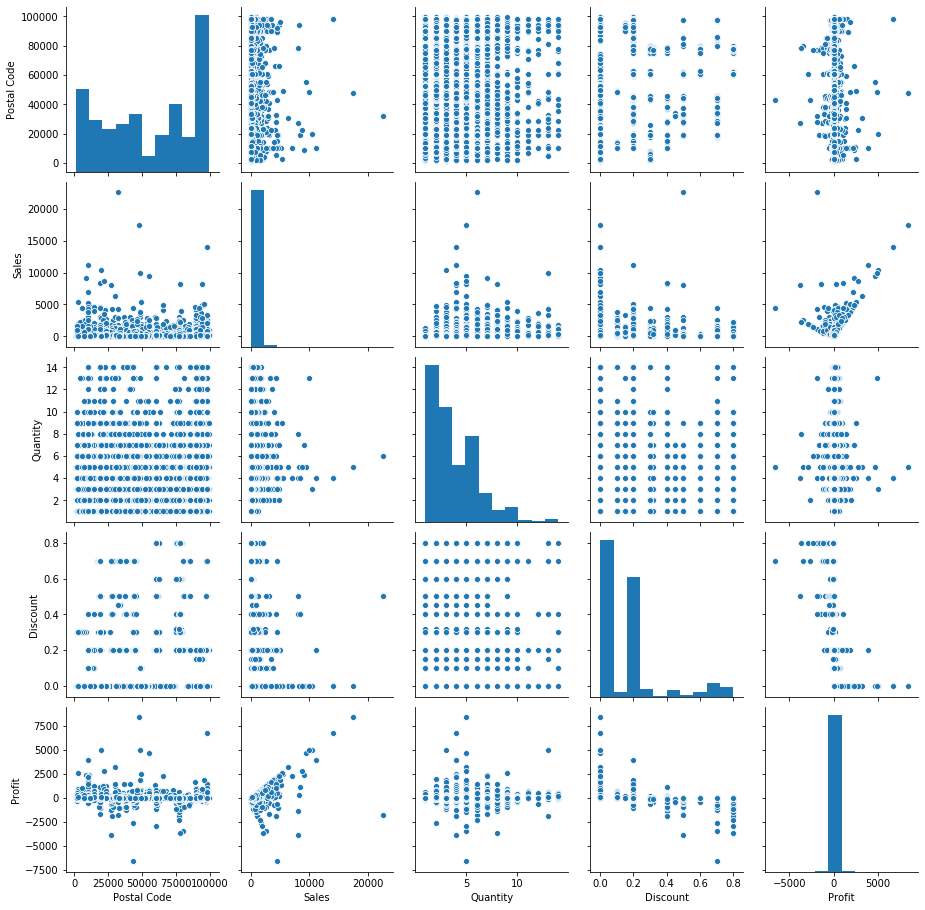

In [20]:
sns.set_palette
sns.pairplot(data)

Text(0.5, 1.0, 'Sales by Category')

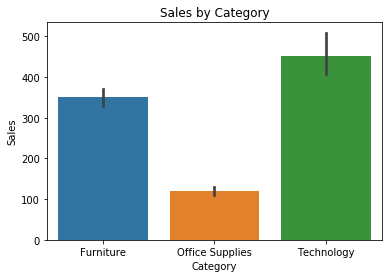

In [21]:
#sales by catagories
sns.barplot(x = "Category", y = "Sales",data = data)
plt.title("Sales by Category")

In [22]:
data_group = data.groupby("Segment")["Quantity"].sum().reset_index()
data_group

,Segment,Quantity
0,Consumer,19521
1,Corporate,11608
2,Home Office,6744


In [31]:
lables = data["Segment"].value_counts()
lables

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [28]:
data.sample(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9708,Standard Class,Consumer,United States,Los Angeles,California,90045,West,Furniture,Furnishings,19.960,2,0.0,5.5888
6124,Standard Class,Corporate,United States,Los Angeles,California,90036,West,Technology,Accessories,44.750,5,0.0,8.5025
8343,Standard Class,Consumer,United States,Knoxville,Tennessee,37918,South,Office Supplies,Labels,59.200,5,0.2,22.2000
5735,Standard Class,Consumer,United States,New York City,New York,10024,East,Office Supplies,Binders,13.920,3,0.2,4.8720
972,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19134,East,Office Supplies,Binders,18.588,2,0.7,-13.6312
1658,Standard Class,Consumer,United States,Los Angeles,California,90045,West,Technology,Phones,160.776,3,0.2,10.0485
2279,First Class,Consumer,United States,Seattle,Washington,98115,West,Furniture,Chairs,97.568,2,0.2,-6.0980
9982,Standard Class,Consumer,United States,Grand Rapids,Michigan,49505,Central,Office Supplies,Paper,35.560,7,0.0,16.7132
8300,Standard Class,Consumer,United States,Detroit,Michigan,48234,Central,Office Supplies,Envelopes,180.960,2,0.0,81.4320
2931,Same Day,Consumer,United States,San Francisco,California,94109,West,Office Supplies,Binders,7.280,2,0.2,2.7300


In [34]:
print(data["Category"].unique())
print(data["Category"].value_counts())

['Furniture' 'Office Supplies' 'Technology']
Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64


In [53]:
#we have to make a groupby of cities and there profits according to there values
dfprofit = data.groupby("City")["Profit"].sum().reset_index().sort_values(by = "Profit",ascending = False)
dfprofit

,City,Profit
329,New York City,62036.9837
266,Los Angeles,30440.7579
452,Seattle,29156.0967
438,San Francisco,17507.3854
123,Detroit,13181.7908
...,...,...
80,Chicago,-6654.5688
241,Lancaster,-7239.0684
434,San Antonio,-7299.0502
207,Houston,-10153.5485


In [55]:
top10cities = dfprofit.head(10)
top10cities

,City,Profit
329,New York City,62036.9837
266,Los Angeles,30440.7579
452,Seattle,29156.0967
438,San Francisco,17507.3854
123,Detroit,13181.7908
233,Lafayette,10018.3876
215,Jackson,7581.6828
21,Atlanta,6993.6629
300,Minneapolis,6824.5846
437,San Diego,6377.1960


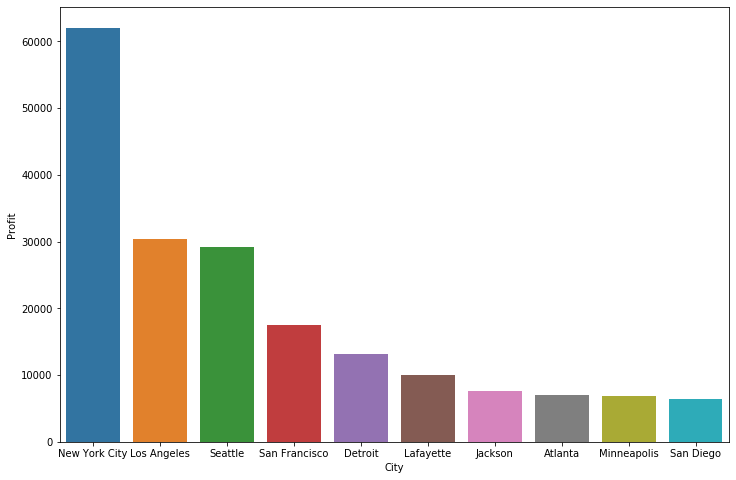

In [73]:
#we can also vizulize top10 cities
plt.figure(figsize  = (12,8))
sns.barplot(x = "City",y = "Profit",data = top10cities)


([<matplotlib.patches.Wedge at 0x23561a20708>,
 [Text(0.5708928505060175, 0.9402560040973492, 'New York City'),
  Text(-0.9150548271587344, 0.6104708537624863, 'Los Angeles'),
  Text(-1.0146726535678938, -0.42478159812012733, 'Seattle'),
  Text(-0.43164080031398905, -1.0117737985855826, 'San Francisco'),
  Text(0.11406225178301234, -1.094070291488709, 'Detroit'),
  Text(0.5150159920744571, -0.9719868969834742, 'Lafayette'),
  Text(0.7721036275375881, -0.7834896223583931, 'Jackson'),
  Text(0.9367008970765529, -0.57670740364242, 'Atlanta'),
  Text(1.0429307747131724, -0.34970759093302844, 'Minneapolis'),
  Text(1.0938980154026627, -0.11570277394304868, 'San Diego')])

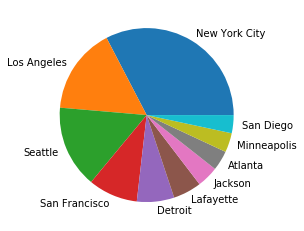

In [104]:
plt.pie(top10cities["Profit"],labels = top10cities["City"].unique())

In [93]:
#data by most profitable product cataogories
dfproduct = data.groupby("Sub-Category")["Profit"].sum().reset_index().sort_values(by = "Profit",ascending = False)
top10product = dfproduct.head(10)
top10product

,Sub-Category,Profit
6,Copiers,55617.8249
13,Phones,44515.7306
0,Accessories,41936.6357
12,Paper,34053.5693
3,Binders,30221.7633
5,Chairs,26590.1663
14,Storage,21278.8264
1,Appliances,18138.0054
9,Furnishings,13059.1436
7,Envelopes,6964.1767


AxesSubplot(0.125,0.125;0.775x0.755)


'\n'

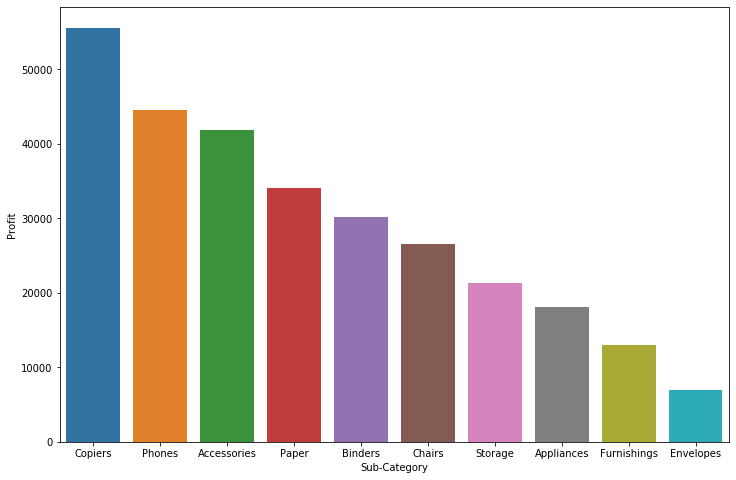

In [118]:
#we can also vizulize top10 productsubcat
plt.figure(figsize = (12,8))
print(sns.barplot(x = "Sub-Category",y = "Profit",data = top10product))
"\n"


([<matplotlib.patches.Wedge object at 0x0000023561EC4E48>, <matplotlib.patches.Wedge object at 0x0000023561ECC5C8>, <matplotlib.patches.Wedge object at 0x0000023561ECC588>, <matplotlib.patches.Wedge object at 0x0000023561ED0048>, <matplotlib.patches.Wedge object at 0x0000023561ED6748>, <matplotlib.patches.Wedge object at 0x0000023561EDC308>, <matplotlib.patches.Wedge object at 0x0000023561EDC888>, <matplotlib.patches.Wedge object at 0x0000023561EE1308>, <matplotlib.patches.Wedge object at 0x0000023561ED6308>, <matplotlib.patches.Wedge object at 0x0000023561ED6E88>], [Text(0.5708928505060175, 0.9402560040973492, 'Copiers'), Text(-0.9150548271587344, 0.6104708537624863, 'Phones'), Text(-1.0146726535678938, -0.42478159812012733, 'Accessories'), Text(-0.43164080031398905, -1.0117737985855826, 'Paper'), Text(0.11406225178301234, -1.094070291488709, 'Binders'), Text(0.5150159920744571, -0.9719868969834742, 'Chairs'), Text(0.7721036275375881, -0.7834896223583931, 'Storage'), Text(0.9367008970

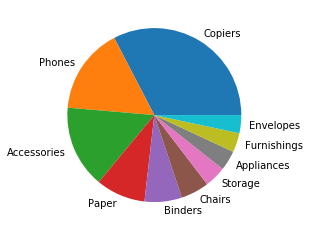

In [117]:
print(plt.pie(top10cities["Profit"],labels = top10product["Sub-Category"].unique()))

In [119]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text xticklabel objects>)

<Figure size 936x720 with 0 Axes>

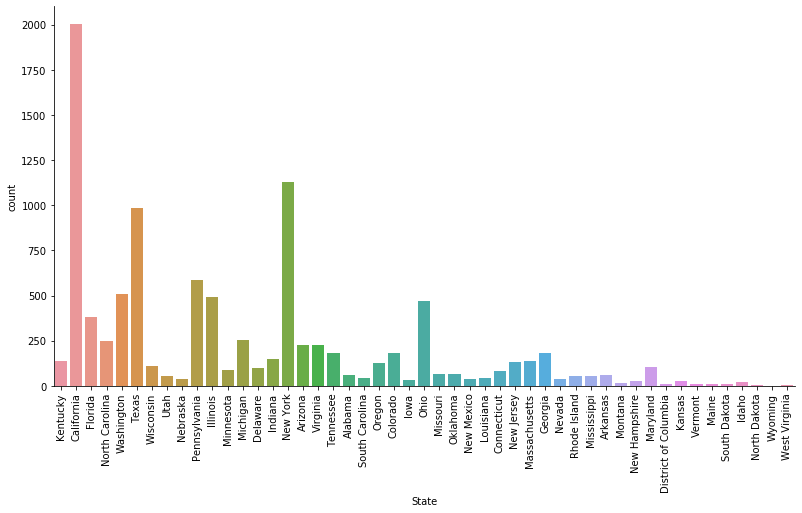

In [132]:
#cites with number of quantityes orders
plt.figure(figsize = (13,10))
sns.catplot("State",data = data,kind = "count",height = 6,aspect = 1.9)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

<Figure size 936x720 with 0 Axes>

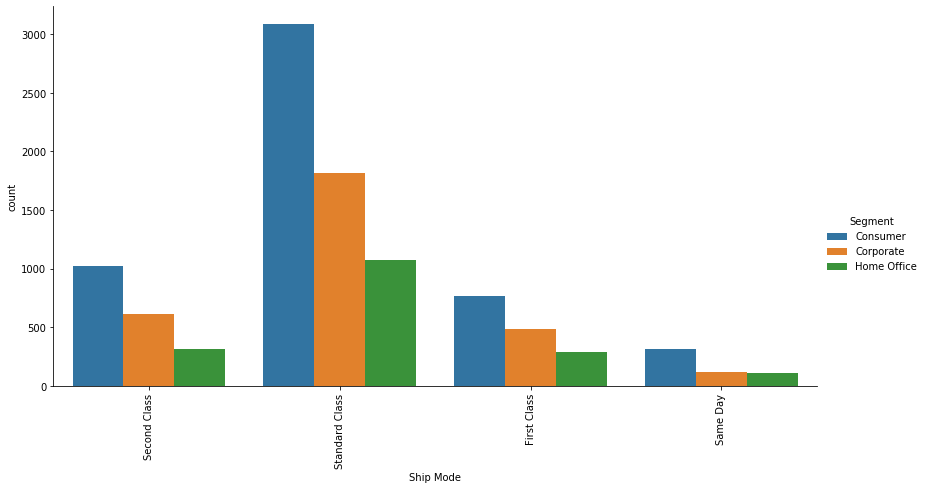

In [134]:
#graph showing relationship of count of shipmode by segement they fall into
plt.figure(figsize = (13,10))
sns.catplot("Ship Mode",data = data,kind = "count",height = 6,aspect = 1.9,hue = "Segment")
plt.xticks(rotation = 90)

In [140]:
group = data.groupby("Segment")["Quantity"].sum().reset_index()
group


,Segment,Quantity
0,Consumer,19521
1,Corporate,11608
2,Home Office,6744


In [142]:
lables = data["Segment"].unique()
lables

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

([<matplotlib.patches.Wedge at 0x23567db1f48>,
 [Text(-0.054766153368137685, 1.1286720818932565, 'Consumer'),
  Text(-0.5525623073148815, -0.985684988490164, 'Corporate'),
  Text(0.9492706706175325, -0.59437798908215, 'Home Office')])

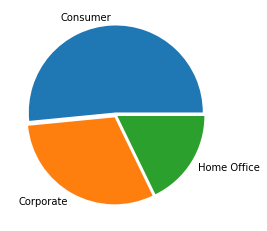

In [146]:
#quoantity by segments 
plt.pie(group["Quantity"],labels=lables,explode=(0.03,0.03,0.02))